For this project I decided to analyise my listening habits on Spotify.

I have been using spotify since it came to Slovenija about 3 years ago. I really like to listen to all kinds of music and sometimes I can't see the correlation between them.

Firstly I asked Spotify to provide me with a zip file of my data, which took about 14 day. The zip contained a lot of json files, with the most important ones being StreamingHistory0, StreamingHistory1 and StreamingHistory2. These three contain my listening history from 3. 12. 2020 till 4. 12. 2021.

After the aquisition of the data, I registered for Spotify for Developers to register my "app". This was so that I could have access to details about songs in Spotifys library.


# 1. Receiving data via Spotify API

The code in this part is commented out as it has been seperatly used in dataCollection.ipynb. Because of the limit of requests you can make in a certain time frame, I ran this code for every json file in the span of three days.

Here we get all of the data from the json file and we save it in a table.

In [ ]:

"""
import ast
from typing import List
from os import listdir


def get_streamings():
    all_streamings = []

    with open('MyData/StreamingHistory2.json', 'r', encoding='UTF-8') as f:
        new_streamings = ast.literal_eval(f.read())
        all_streamings += [streaming for streaming in new_streamings]
    return all_streamings

"""

In the bottom code we "connect" with the Spotify API and create a token for getting data. The username, client_id and client_secret have been replaced for security.

In [ ]:
"""
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth

username = #
client_id = #
client_secret = #

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret, requests_timeout=10000)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

"""

The below method gets the track_id for each song based on the name of the song and the artist.

In [ ]:
"""
def get_id(track_name: str, artist_name: str) -> str:
    
    try:    
        response = spotify.search(q='artist:' + artist_name + ' track:' + track_name, type='track')
        first_result = response['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
    except Exception as e:
        print('Error: ', e)
        return None
"""

The below method gets audio_features of each song as defined by Spotify.

Audio features, as defined by Spotify:
- *acusticness* - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- *danceability* - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- *energy* - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- *instrumentalness* - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0
- *liveness* - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- *loudness* - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- *mode* - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- *speechiness* - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- *tempo* - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- *valence* - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [ ]:
"""
def get_features(track_id: str) -> dict:
    try:
        features = spotify.audio_features([track_id])
        return features[0]
    except:
        print('Feature error')
        return None
"""

In this section we add the audio features to each song.

In [ ]:
"""
streamings = get_streamings()

trackName = ''
trackId = ''
features = None
artistName = ''

for track in streamings:
    trackName = track['trackName']
    trackArtist = track['artistName']
    trackId = get_id(trackName, trackArtist)
    features = get_features(trackId)

    if(features != None):
        track.update(features)
    else:
        print('None')
    print(track)

"""

Here we change the list of songs with newly added audio_features into a csv file.

In [ ]:
"""
import pandas as pd
df = pd.DataFrame(streamings)
df.to_csv('streaming_history2.csv')
"""

# 2. Import and joining of data

In [1]:
import pandas as pd

df1 = pd.read_csv('streaming_history0.csv', index_col=0, sep=',', decimal='.')
df2 = pd.read_csv('streaming_history1.csv', index_col=0, sep=',', decimal='.')
df3 = pd.read_csv('streaming_history2.csv', index_col=0, sep=',', decimal='.')

df = pd.concat([df1, df2, df3], ignore_index=True)

df.head()

endTime     artistName                         trackName  \
0  2020-12-03 22:32  Black Sabbath                  Sleeping Village   
1  2020-12-04 06:50  Black Sabbath                  Sleeping Village   
2  2020-12-04 06:53          KATYA  Ding Dong! (feat. Trixie Mattel)   
3  2020-12-04 06:58      Pearl Jam                         Even Flow   
4  2020-12-04 07:33            Six                          Get Down   

   msPlayed  danceability  energy   key  loudness  mode  speechiness  ...  \
0     34833         0.356   0.552   0.0   -13.307   1.0       0.0590  ...   
1      6680         0.356   0.552   0.0   -13.307   1.0       0.0590  ...   
2    170275         0.777   0.797   7.0    -5.639   1.0       0.1630  ...   
3    292580         0.394   0.944  10.0    -6.506   0.0       0.0761  ...   
4     89574         0.898   0.406   4.0    -9.905   0.0       0.1020  ...   

   liveness  valence    tempo            type                      id  \
0    0.1280    0.339  136.257  audio_features  01xU5pDHQ8FfVhEi98UFMY   
1    0.1280    0.339  136.257  audio_features  01xU5pDHQ8FfVhEi98UFMY   
2    0.2850    0.738  120.076  audio_features  5ZdXORIEqtJ9VRH1JZKBYS   
3    0.2980    0.265  105.338  audio_features  6QewNVIDKdSl8Y3ycuHIei   
4    0.0509    0.390  102.985  audio_features  198ZUXC5jCr5DiQNlKBiNV   

                                    uri  \
0  spotify:track:01xU5pDHQ8FfVhEi98UFMY   
1  spotify:track:01xU5pDHQ8FfVhEi98UFMY   
2  spotify:track:5ZdXORIEqtJ9VRH1JZKBYS   
3  spotify:track:6QewNVIDKdSl8Y3ycuHIei   
4  spotify:track:198ZUXC5jCr5DiQNlKBiNV   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/01xU5pDHQ8Ff...   
1  https://api.spotify.com/v1/tracks/01xU5pDHQ8Ff...   
2  https://api.spotify.com/v1/tracks/5ZdXORIEqtJ9...   
3  https://api.spotify.com/v1/tracks/6QewNVIDKdSl...   
4  https://api.spotify.com/v1/tracks/198ZUXC5jCr5...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/01xU...    853399.0   
1  https://api.spotify.com/v1/audio-analysis/01xU...    853399.0   
2  https://api.spotify.com/v1/audio-analysis/5ZdX...    170275.0   
3  https://api.spotify.com/v1/audio-analysis/6Qew...    292581.0   
4  https://api.spotify.com/v1/audio-analysis/198Z...    253993.0   

  time_signature  
0            4.0  
1            4.0  
2            4.0  
3            4.0  
4            4.0  

[5 rows x 22 columns]

# 3. "Cleaning" the dataframe

### 3.1 Deletion of unneeded columns

In [2]:

print('Names of columns: ', df.columns)

Names of columns:  Index(['endTime', 'artistName', 'trackName', 'msPlayed', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')


We will only need the audio feataures for the analysis.

In [3]:
df.drop(columns=['endTime', 'msPlayed', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms'], inplace=True)
df.head()

artistName                         trackName  danceability  energy  \
0  Black Sabbath                  Sleeping Village         0.356   0.552   
1  Black Sabbath                  Sleeping Village         0.356   0.552   
2          KATYA  Ding Dong! (feat. Trixie Mattel)         0.777   0.797   
3      Pearl Jam                         Even Flow         0.394   0.944   
4            Six                          Get Down         0.898   0.406   

    key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.0   -13.307   1.0       0.0590       0.08020          0.049200   
1   0.0   -13.307   1.0       0.0590       0.08020          0.049200   
2   7.0    -5.639   1.0       0.1630       0.01920          0.000162   
3  10.0    -6.506   0.0       0.0761       0.00178          0.000005   
4   4.0    -9.905   0.0       0.1020       0.00986          0.000000   

   liveness  valence    tempo  time_signature  
0    0.1280    0.339  136.257             4.0  
1    0.1280    0.339  136.257             4.0  
2    0.2850    0.738  120.076             4.0  
3    0.2980    0.265  105.338             4.0  
4    0.0509    0.390  102.985             4.0

### 3.2 Deleting empty rows

Because of connection errors and other things, some songs did not have any audio features. These are deleted.

In [4]:
print('Nr. of rows, and columns: ', df.shape)
df.isnull().sum()

Nr. of rows, and columns:  (20998, 14)


artistName            0
trackName             0
danceability        851
energy              851
key                 851
loudness            851
mode                851
speechiness         851
acousticness        851
instrumentalness    851
liveness            851
valence             851
tempo               851
time_signature      851
dtype: int64

In [5]:
df.dropna(axis=0, inplace=True)
print(df.shape)
print(df.isnull().sum())

(20147, 14)
artistName          0
trackName           0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64


# 4. Some baseline info on the music I listen to

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>]], dtype=object)

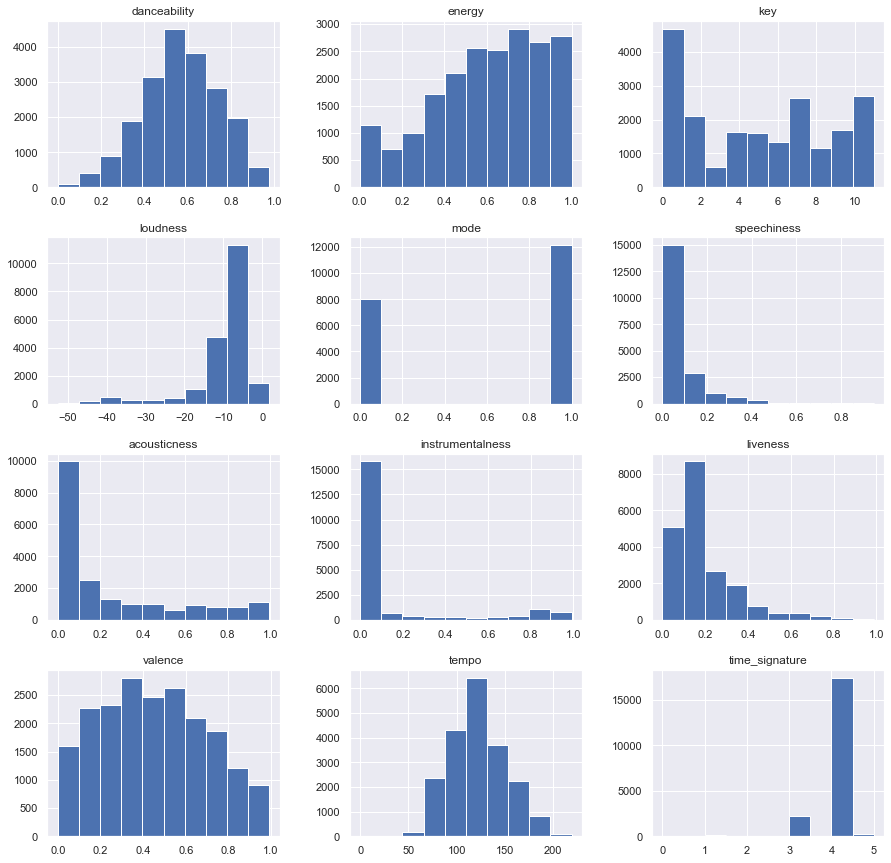

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()
df.hist(figsize=(15,15))

Based on this graph we can see that the music is mostly very energetic and loud. It is also quite positive with a medium tempo.

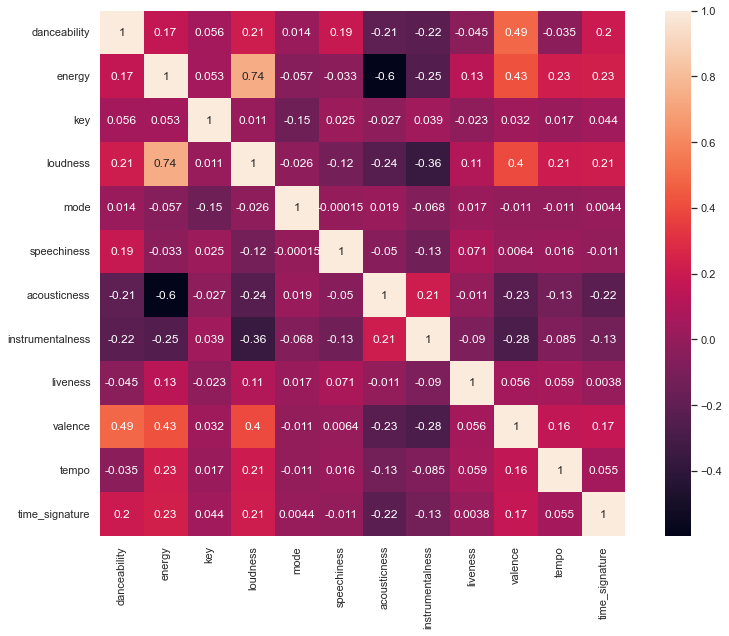

In [7]:
corr = df.corr()

f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corr, square=True, linecolor='white', vmax=1.0, annot=True)
plt.tight_layout()

# 5. Standardization

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

stevilski = df.select_dtypes(include=['float64']).columns
print(stevilski)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')


In [9]:
df_copy1 = df

df_copy1[stevilski] = StandardScaler().fit_transform(df_copy1[stevilski])

dfStandard = df_copy1[stevilski]
dfStandard

danceability    energy       key  loudness      mode  speechiness  \
0         -1.198586 -0.190746 -1.442389 -0.446480  0.811962    -0.314151   
1         -1.198586 -0.190746 -1.442389 -0.446480  0.811962    -0.314151   
2          1.178355  0.756467  0.552636  0.533349  0.811962     0.655741   
3         -0.984040  1.324795  1.407646  0.422562 -1.231585    -0.154679   
4          1.861514 -0.755208 -0.302375 -0.011767 -1.231585     0.086862   
...             ...       ...       ...       ...       ...          ...   
20993     -1.480883 -1.760414 -0.872382 -1.835465  0.811962    -0.503467   
20994     -1.480883 -1.760414 -0.872382 -1.835465  0.811962    -0.503467   
20995     -1.638969 -1.099297 -0.017372 -0.509221  0.811962    -0.571546   
20996     -1.638969 -1.099297 -0.017372 -0.509221  0.811962    -0.571546   
20997     -1.638969 -1.099297 -0.017372 -0.509221  0.811962    -0.571546   

       acousticness  instrumentalness  liveness   valence     tempo  \
0         -0.565851         -0.303473 -0.415963 -0.448174  0.481764   
1         -0.565851         -0.303473 -0.415963 -0.448174  0.481764   
2         -0.767256         -0.476663  0.615569  1.154301 -0.071910   
3         -0.824772         -0.477219  0.700983 -0.745375 -0.576208   
4         -0.798094         -0.477235 -0.922530 -0.243346 -0.656722   
...             ...               ...       ...       ...       ...   
20993      2.372019         -0.448981 -0.700455 -0.584726  0.438923   
20994      2.372019         -0.448981 -0.700455 -0.584726  0.438923   
20995      2.342304         -0.477078  0.116229 -0.717261 -0.731590   
20996      2.342304         -0.477078  0.116229 -0.717261 -0.731590   
20997      2.342304         -0.477078  0.116229 -0.717261 -0.731590   

       time_signature  
0            0.277402  
1            0.277402  
2            0.277402  
3            0.277402  
4            0.277402  
...               ...  
20993        0.277402  
20994        0.277402  
20995        0.277402  
20996        0.277402  
20997        0.277402  

[20147 rows x 12 columns]

# 6. Dendrogram

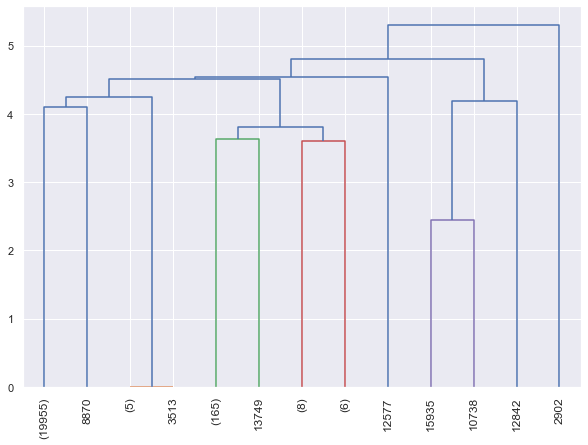

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

razdalje1 = linkage(dfStandard, 'single')
max_nivo = 5

plt.figure(figsize=(10, 7))
dendrogram(razdalje1, orientation='top', distance_sort='descending', p=max_nivo, truncate_mode='level', show_leaf_counts=True, leaf_rotation=90)
plt.show()

Via this dendrogram we can see that we cannot separate the songs into many clusters.

# 7. Metoda komolca

Text(0.5, 0, '#. of clusters')

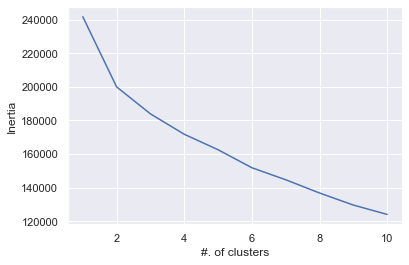

In [11]:
from sklearn.cluster import KMeans, Birch

vrednosti_inertia1 = {}

for i in range(1, 11):
    km1 = KMeans(n_clusters=i).fit(dfStandard)
    vrednosti_inertia1[i]=km1.inertia_

sns.lineplot(x=list(vrednosti_inertia1.keys()), y=list(vrednosti_inertia1.values()))
plt.ylabel('Inertia')
plt.xlabel('#. of clusters')


Here we can see that the best number of clusters to use is 2.

# 8. K-means algorithm

### 8.1 K-means algorithm without using algorithms for dimension reduction

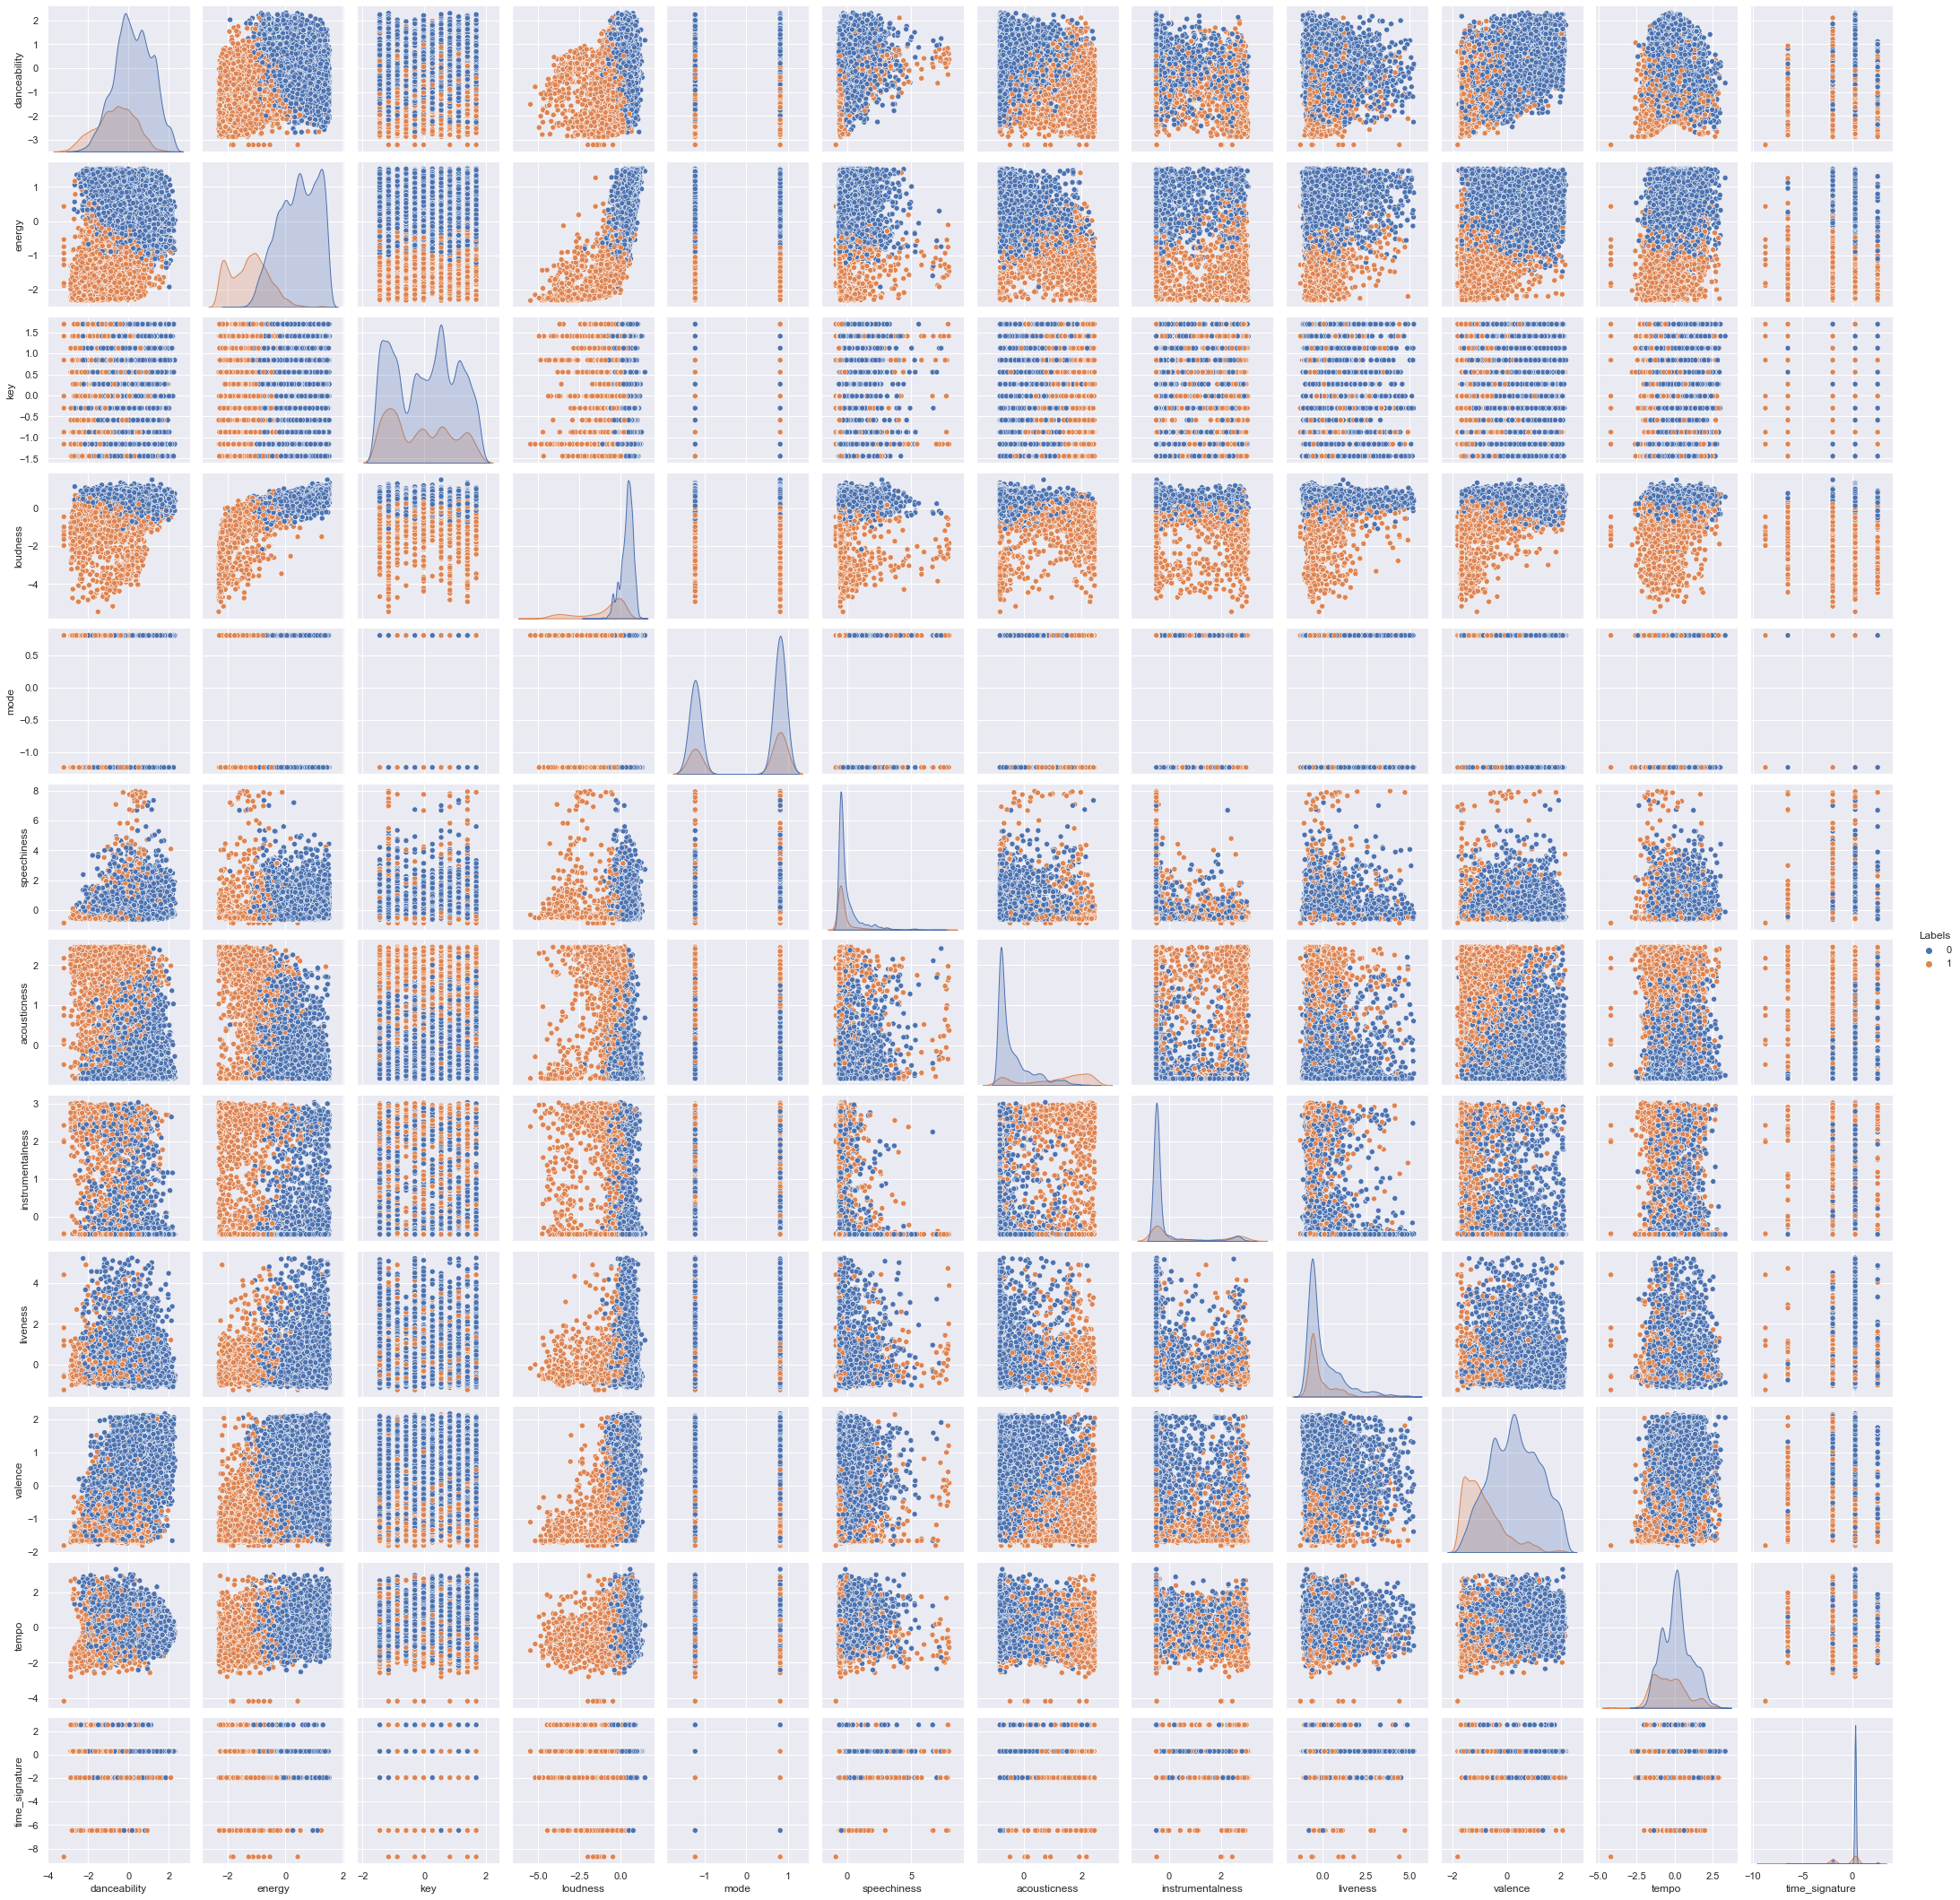

In [32]:
km1 = KMeans(n_clusters = 2, random_state=0).fit(dfStandard)
df_tmp = df
df_tmp['Labels'] = km1.labels_
sns.pairplot(df_tmp, hue='Labels')

In [33]:
df_tmp.groupby(km1.labels_).mean()

danceability    energy       key  loudness      mode  speechiness  \
0      0.230937  0.441482  0.041657  0.372676 -0.015469     0.015045   
1     -0.655797 -1.253684 -0.118293 -1.058295  0.043928    -0.042723   

   acousticness  instrumentalness  liveness   valence     tempo  \
0     -0.378204         -0.202658  0.038689  0.303334  0.123767   
1      1.073994          0.575491 -0.109865 -0.861383 -0.351464   

   time_signature  Labels  
0        0.218153     0.0  
1       -0.619494     1.0

Here we can see, that the songs in the first cluster are very energetic and loud, are not very instrumental and are more positive.
In the second cluster the songs are not very dancable and are of a more calm nature, and not very loud. They are more accustic and less "live".

### 8.2 Using FastICA

In [13]:
from sklearn.decomposition import FastICA, PCA

dfFast = FastICA(n_components=2).fit_transform(dfStandard)
dfFast = pd.DataFrame(dfFast, columns=('First Column F', 'Second Column F'))
dfFast.head()

First Column F  Second Column F
0        0.004142        -0.002310
1        0.004142        -0.002310
2       -0.005374         0.008817
3        0.008589         0.002080
4       -0.008704         0.003060

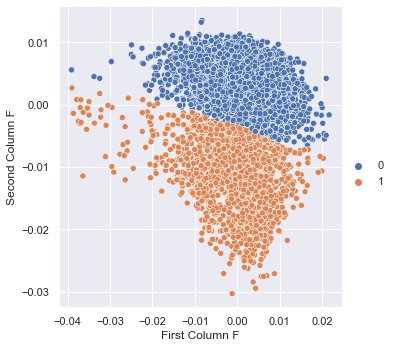

In [14]:
km2 = KMeans(n_clusters = 2, random_state=0).fit(dfFast)
sns.relplot(x="First Column F", y="Second Column F", hue=km2.labels_, data=dfFast)

In [29]:
df.groupby(km2.labels_).mean()

danceability    energy       key  loudness      mode  speechiness  \
0      0.223968  0.429104  0.037904  0.371483 -0.012320     0.006414   
1     -0.664103 -1.272364 -0.112391 -1.101509  0.036532    -0.019019   

   acousticness  instrumentalness  liveness   valence     tempo  \
0     -0.356790         -0.207552  0.053405  0.301496  0.135533   
1      1.057942          0.615426 -0.158354 -0.893986 -0.401877   

   time_signature  
0        0.203449  
1       -0.603260

Here we get simillar results as above.

### 8.3 Using PCA

In [15]:

dfP = PCA(n_components=2).fit_transform(dfStandard)
dfP = pd.DataFrame(dfP, columns=('First Column P', 'Second Column P'))
dfP.head()


First Column P  Second Column P
0        0.411034        -0.717984
1        0.411034        -0.717984
2       -1.965591         1.074823
3       -0.837946        -1.319528
4       -0.422603         1.464498

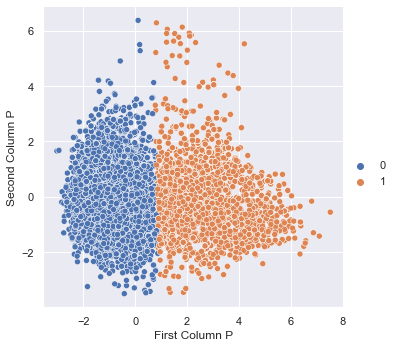

In [16]:
km3 = KMeans(n_clusters = 2, random_state=0).fit(dfP)
sns.relplot(x="First Column P", y="Second Column P", hue=km3.labels_, data=dfP)

In [28]:
df.groupby(km3.labels_).mean()

danceability    energy       key  loudness      mode  speechiness  \
0      0.231787  0.432158  0.041913  0.371749 -0.012553     0.011656   
1     -0.671116 -1.251269 -0.121355 -1.076360  0.036346    -0.033749   

   acousticness  instrumentalness  liveness   valence     tempo  \
0     -0.360314         -0.211824  0.055304  0.309331  0.130671   
1      1.043252          0.613314 -0.160127 -0.895636 -0.378344   

   time_signature  
0        0.208850  
1       -0.604704

# 9. Using the Birch algorithm

### 9.1 FastICA

C:\Users\sasaj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (2). Decrease the threshold.
  warnings.warn(


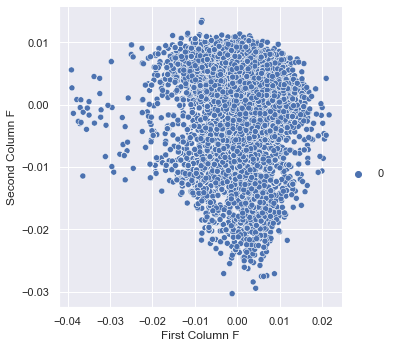

In [17]:
birch1 = Birch(n_clusters=2).fit(dfFast)
sns.relplot(x='First Column F', y='Second Column F', hue=birch1.labels_, data=dfFast)

### 9.2 PCA

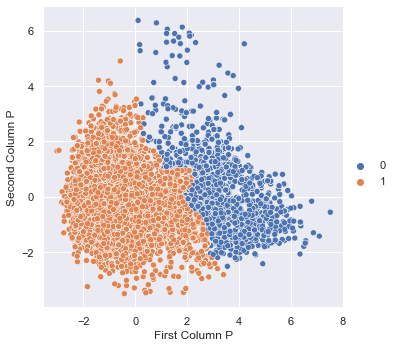

In [18]:
birch2 = Birch(n_clusters=2).fit(dfP)
sns.relplot(x='First Column P', y='Second Column P', hue=birch2.labels_, data=dfP)

In [27]:
df.groupby(birch2.labels_).mean()

danceability    energy       key  loudness      mode  speechiness  \
0     -0.761145 -1.618593 -0.120180 -1.787262  0.077551     0.296298   
1      0.131554  0.279753  0.020772  0.308906 -0.013404    -0.051211   

   acousticness  instrumentalness  liveness   valence     tempo  \
0      1.066593          0.891184 -0.227710 -1.048793 -0.656092   
1     -0.184347         -0.154030  0.039357  0.181271  0.113397   

   time_signature  
0       -0.734155  
1        0.126889

#### What I discovered?

I always thought that I have a very warried taste in music, but based on this analysis I see that my song choice is divided into two: energetic, loud and positive ANd melancholic with not a lot of talking.